In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("dataset.csv", low_memory=False)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68965 entries, 0 to 68964
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marka_pojazdu            68964 non-null  object 
 1   rok_produkcji            68749 non-null  float64
 2   moc                      68702 non-null  float64
 3   model_pojazdu            68964 non-null  object 
 4   skrzynia_biegow          47753 non-null  object 
 5   wersja                   43602 non-null  object 
 6   kraj_pochodzenia         68965 non-null  object 
 7   uszkodzony               3013 non-null   object 
 8   zarejestrowany_w_polsce  37980 non-null  object 
 9   generacja                46283 non-null  object 
 10  stan                     68749 non-null  object 
 11  rodzaj_lakieru           51057 non-null  object 
 12  bezwypadkowy             43380 non-null  object 
 13  rodzaj_paliwa            68729 non-null  object 
 14  l_miejsc              

In [96]:
df.corr()

,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,srednie_spalanie,cena,l_drzwi
rok_produkcji,1.000000,0.217005,0.041601,-0.110400,-0.659066,0.019839,0.051188,0.222289
moc,0.217005,1.000000,-0.047654,0.810162,-0.187372,0.032695,0.083581,-0.175281
l_miejsc,0.041601,-0.047654,1.000000,-0.004875,0.090918,0.009031,-0.010417,0.316155
pojemnosc_skokowa,-0.110400,0.810162,-0.004875,1.000000,0.089379,0.027886,0.042035,-0.232292
przebieg,-0.659066,-0.187372,0.090918,0.089379,1.000000,-0.025668,-0.052376,-0.021068
srednie_spalanie,0.019839,0.032695,0.009031,0.027886,-0.025668,1.000000,0.002430,0.002616
cena,0.051188,0.083581,-0.010417,0.042035,-0.052376,0.002430,1.000000,-0.007960
l_drzwi,0.222289,-0.175281,0.316155,-0.232292,-0.021068,0.002616,-0.007960,1.000000


In [97]:
df["cena"] = df["cena"].fillna(-1)
# df["cena"] = df["cena"].astype("int")

In [98]:
average_cars = df[df["cena"].between(0, 100000)]
average_cars.head(6)

,marka_pojazdu,rok_produkcji,moc,model_pojazdu,skrzynia_biegow,wersja,kraj_pochodzenia,uszkodzony,zarejestrowany_w_polsce,generacja,...,pojemnosc_skokowa,przebieg,czy_zabytek,kolor,srednie_spalanie,typ_nadwozia,cena,l_drzwi,naped,link
2,Dacia,2022.0,100.0,Sandero Stepway,Manualna,NaN,Inny,NaN,NaN,NaN,...,999.0,10.0,NaN,złoty,0.0,Auta miejskie,77400.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/dacia-sandero-st...
3,Ford,2018.0,86.0,Focus,Manualna,1.6 Trend,Inny,NaN,NaN,Mk3 (2010-2018),...,1596.0,192763.0,NaN,NaN,0.0,Sedan,26500.0,4.0,NaN,https://www.otomoto.pl/oferta/ford-focus-ford-...
4,Toyota,2020.0,132.0,Corolla,Manualna,NaN,Polska,NaN,Tak,Seria E21 (2019-),...,1598.0,40572.0,NaN,niebieski,0.0,Sedan,79900.0,4.0,Na przednie koła,https://www.otomoto.pl/oferta/toyota-corolla-1...
5,Kia,2006.0,65.0,Picanto,Manualna,1.1 (els4),Niemcy,NaN,NaN,I (2004-2010),...,1086.0,150240.0,NaN,czarny,0.0,Auta małe,8999.0,5.0,Na przednie koła,https://www.otomoto.pl/oferta/kia-picanto-1-1p...
8,Mercedes-Benz,2010.0,170.0,Klasa E,Automatyczna,220 CDI Avantgarde,Inny,NaN,Tak,W212 (2009-2016),...,2143.0,360000.0,NaN,niebieski,0.0,Sedan,33900.0,4.0,Na tylne koła,https://www.otomoto.pl/oferta/mercedes-benz-kl...
11,Opel,2012.0,110.0,Astra,Manualna,GTC 1.7 CDTI DPF ecoFLEX Start/Stop,Inny,NaN,Tak,J (2009-2019),...,1686.0,165092.0,NaN,czerwony,0.0,Kompakt,27900.0,3.0,Na przednie koła,https://www.otomoto.pl/oferta/opel-astra-opel-...


In [101]:
average_cars.describe()

,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,srednie_spalanie,cena,l_drzwi
count,48899.000000,48887.000000,46582.000000,34068.000000,4.886500e+04,48899.000000,48899.000000,48772.000000
mean,2012.063437,138.583632,5.028487,1789.821328,1.642089e+05,0.149938,43739.682675,4.698536
std,6.042471,53.781239,0.682743,623.335548,8.603050e+04,1.021698,25796.300104,0.688970
min,1935.000000,1.000000,1.000000,400.000000,1.000000e+00,0.000000,1400.000000,2.000000
25%,2008.000000,105.000000,5.000000,1398.000000,1.030000e+05,0.000000,22500.000000,5.000000
50%,2013.000000,130.000000,5.000000,1598.000000,1.660000e+05,0.000000,38900.000000,5.000000
75%,2017.000000,160.000000,5.000000,1995.000000,2.190000e+05,0.000000,63000.000000,5.000000
max,2023.000000,560.000000,9.000000,8189.000000,1.830000e+06,18.000000,100000.000000,5.000000


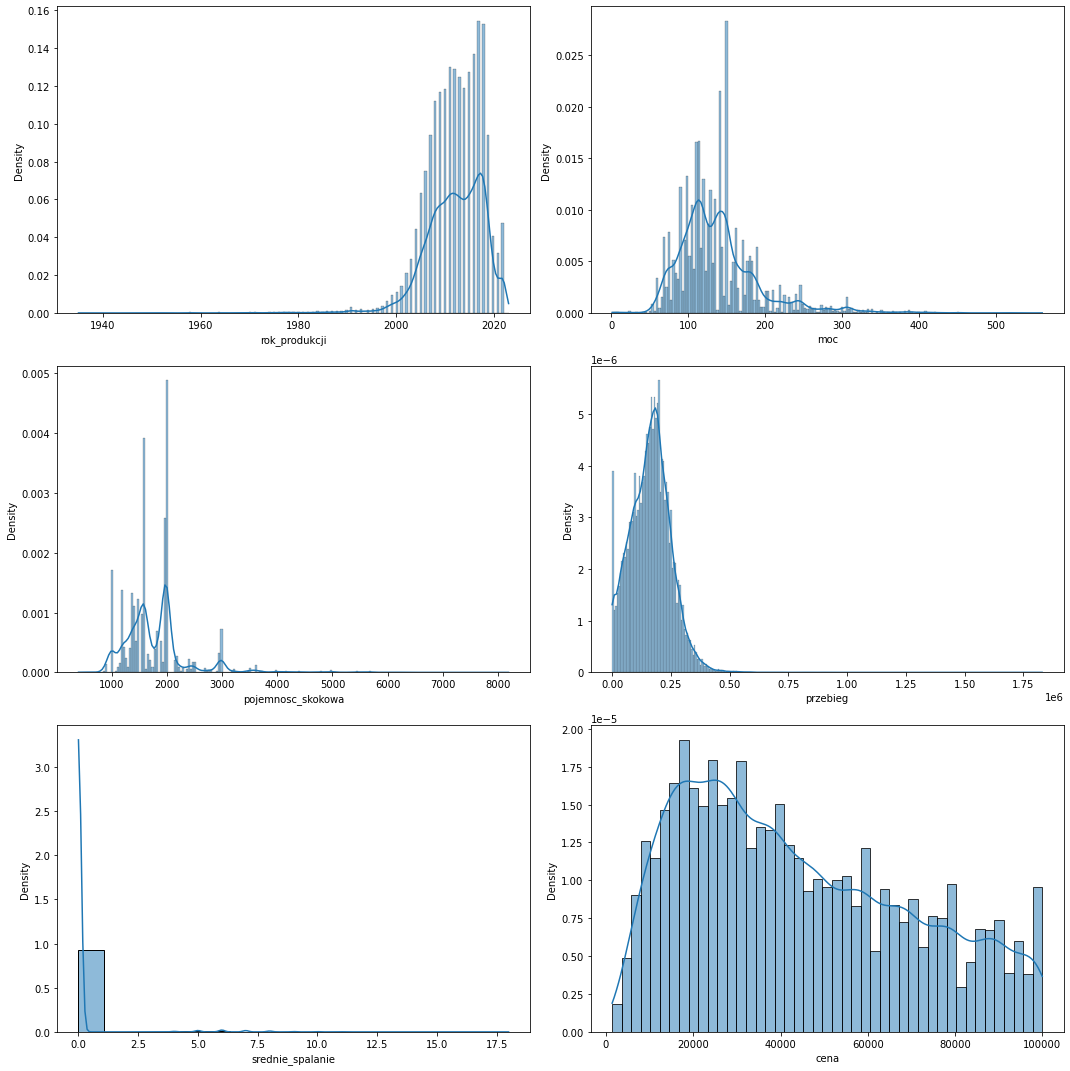

In [99]:
cols = ["rok_produkcji", "moc", "pojemnosc_skokowa", "przebieg", "srednie_spalanie", "cena"]


fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()  


for col, ax in zip(cols, axes):
    sns.histplot(data=average_cars[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

# sns.displot(average_cars["cena"])

In [100]:
average_cars.corr()

,rok_produkcji,moc,l_miejsc,pojemnosc_skokowa,przebieg,srednie_spalanie,cena,l_drzwi
rok_produkcji,1.000000,-0.041959,0.030233,-0.326961,-0.521430,-0.024891,0.647354,0.288375
moc,-0.041959,1.000000,0.055634,0.817994,0.187006,0.042654,0.342536,-0.073478
l_miejsc,0.030233,0.055634,1.000000,0.081434,0.130402,0.007340,0.029893,0.297668
pojemnosc_skokowa,-0.326961,0.817994,0.081434,1.000000,0.364164,0.048914,0.094111,-0.141067
przebieg,-0.521430,0.187006,0.130402,0.364164,1.000000,0.023938,-0.479694,-0.039316
srednie_spalanie,-0.024891,0.042654,0.007340,0.048914,0.023938,1.000000,-0.005228,-0.012212
cena,0.647354,0.342536,0.029893,0.094111,-0.479694,-0.005228,1.000000,0.124865
l_drzwi,0.288375,-0.073478,0.297668,-0.141067,-0.039316,-0.012212,0.124865,1.000000
